In [1]:
using Pkg
Pkg.activate("/Users/ryansenne/Documents/Github/SSM/")
# Pkg.activate("/home/ryansenne/PycharmProjects/ssm_julia/")

  Activating project at `\Users\ryansenne\Documents\Github\SSM`


In [2]:
include("/Users/ryansenne/Documents/Github/SSM//src/SSM.jl")
# include("/home/ryansenne/PycharmProjects/ssm_julia/src/SSM.jl")
using Random
using .SSM
using Distributions
using Plots

In [3]:
# generate data from a "switching gaussian regression"
n = 100

A = [0.9 0.1; 0.1 0.9]
β₁, β₂ = [1.0, 2.0], [2.0, 1.0]
σ²₁, σ²₂ = 1.0, 0.5

X = randn(n, 1)
X = [ones(n) X]

Y = zeros(n)
S = zeros(n)

for i in 1:n
    if i == 1
        S[i] = rand(Bernoulli(0.5))
    else
        S[i] = rand(Bernoulli(A[Int(S[i-1]) + 1, 1]) )
    end
    if S[i] == 0
        Y[i] = X[i, :]'*β₁ + rand(Normal(0, sqrt(σ²₁)))
    else
        Y[i] = X[i, :]'*β₂ + rand(Normal(0, sqrt(σ²₂)))
    end
end

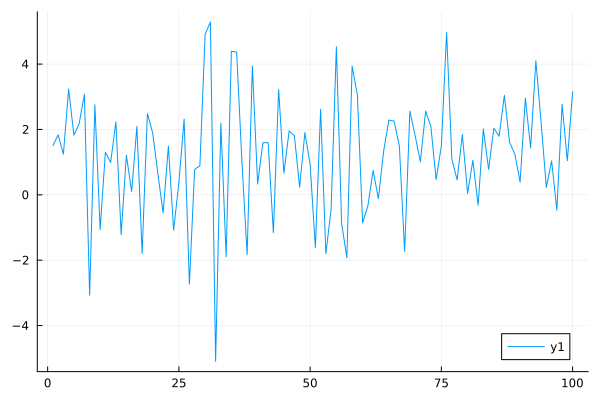

In [4]:
plot(Y)

In [5]:
model = SwitchingGaussianRegression(;K=2)

SwitchingGaussianRegression{Float64}([0.2840592580948734 0.7159407419051267; 0.3871252711518648 0.612874728848135], RegressionEmissions[RegressionEmissions(Main.SSM.GaussianRegression(Float64[], 0.0, true)), RegressionEmissions(Main.SSM.GaussianRegression(Float64[], 0.0, true))], [0.18913401752085265, 0.8108659824791472], 2)

In [6]:
ll = SSM.fit!(model, reshape(X[:, 2], length(X[:, 2]), 1), Y, 1000, 1e-3, true)

Log-Likelihood at iter 1: -208.71122722186513
Log-Likelihood at iter 2: -157.09072427673433
Log-Likelihood at iter 3: -151.56664729028464
Log-Likelihood at iter 4: -149.55229024195725
Log-Likelihood at iter 5: -148.83627005431413
Log-Likelihood at iter 6: -148.48338895878513
Log-Likelihood at iter 7: -148.20869327818235
Log-Likelihood at iter 8: -147.9314606225164
Log-Likelihood at iter 9: -147.62635956761258
Log-Likelihood at iter 10: -147.282418451938
Log-Likelihood at iter 11: -146.89301892050557
Log-Likelihood at iter 12: -146.45351577830482
Log-Likelihood at iter 13: -145.96131711677467
Log-Likelihood at iter 14: -145.42026851623473
Log-Likelihood at iter 15: -144.85401538115298
Log-Likelihood at iter 16: -144.3227469081264
Log-Likelihood at iter 17: -143.91002209966578
Log-Likelihood at iter 18: -143.6609558368629
Log-Likelihood at iter 19: -143.54451224694142
Log-Likelihood at iter 20: -143.4976730244251
Log-Likelihood at iter 21: -143.4772468051965
Log-Likelihood at iter 22: -1

46-element Vector{Float64}:
  -Inf
 -208.71122722186513
 -157.09072427673433
 -151.56664729028464
 -149.55229024195725
 -148.83627005431413
 -148.48338895878513
 -148.20869327818235
 -147.9314606225164
 -147.62635956761258
    ⋮
 -143.39752034398077
 -143.3956760769426
 -143.39399325162796
 -143.39245632756555
 -143.39105145187096
 -143.38976625147663
 -143.38858965385657
 -143.38751173200512
 -143.38652357010676

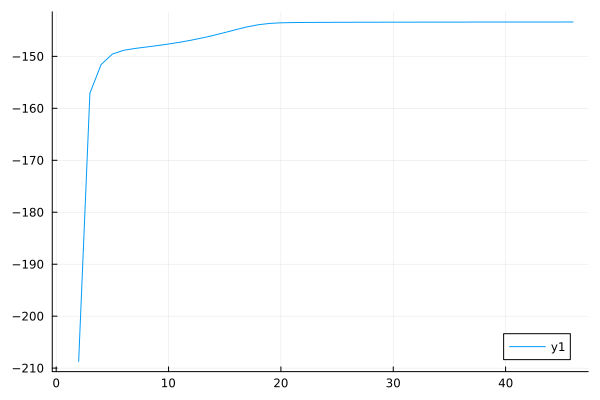

In [8]:
plot(ll)

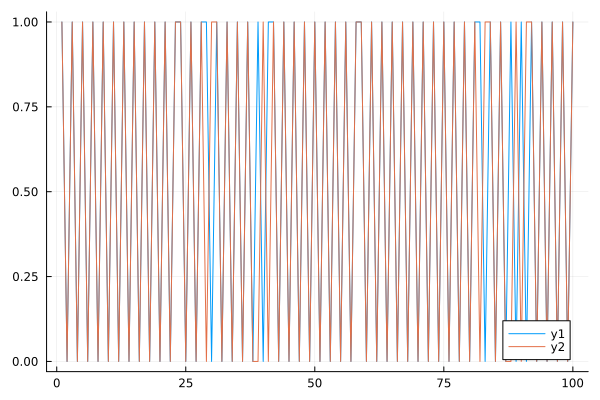

In [10]:
plot(SSM.viterbi(model, reshape(X[:, 2], length(X[:, 2]), 1), Y).-1)
plot!(S) # thes states are flipped, so i subtract from 1 to get the correct plot

In [11]:
model.B

2-element Vector{RegressionEmissions}:
 RegressionEmissions(Main.SSM.GaussianRegression([1.3011944042282981, 2.1944590537052857], 1.092904728832676, true))
 RegressionEmissions(Main.SSM.GaussianRegression([1.8703422015552005, 0.9894319526605382], 0.6351762765290783, true))